In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 1000
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    
    return (x1, y1, x2, y2)

In [3]:
(x1, y1, x2, y2) = gen_data(n, 1.5, 1, 1.5)

In [4]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

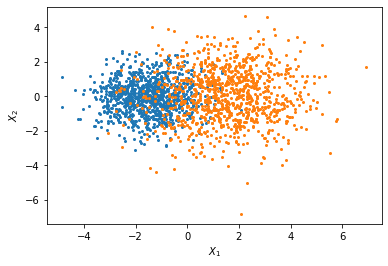

In [5]:
plot_data(x1, y1, x2, y2)

logistic regression:

logistic regression is a linear model that models probabilities
on a non-linear scale.

p(x) = p(y=1|x)
probability of x = propability of y being 1 given the value of x

y must be either 1 or 0

linear model:
$p(x) = \beta0 + \beta1 x1$

Logistic regression formula (for 1 to p predictors):

$log \frac{p(x)}{1-p(x)} = \beta0 +\beta1x1,\ldots\beta pxp$


In [6]:
# the following code creates a function that converts probability to odds:

def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

prob_to_odds(0.8)

4.000000000000001

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
X = np.vstack( (np.vstack((x1,y1)).T, np.vstack((x2,y2)).T) )

In [9]:
X.shape

(2000, 2)

In [10]:
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [11]:
y.shape

(2000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [13]:
X_test.shape

(1000, 2)

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X_train, y_train)

/home/pk/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
clf.score(X_test, y_test)

0.884

In [17]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.96062192, 0.03937808]])

In [21]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [23]:
def plot_probs(ax, clf, class_no):
    '''
    class_no = class / outcome we want to plot
    '''
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    

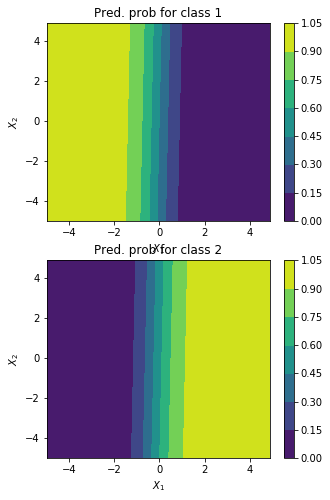

In [26]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");